In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="homework.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Take-Home <br>(Day 2)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the dataset (Types of Flower Data)

The dataset contains the information of the three different species of the iris flower. The dataset contains values of four features (sepal length, sepal width, petal length, and petal width) of each flower and the species of iris.

Attribute Information:

**sepal length:** Sepal length of a flower in cm

**sepal width:** Sepal width of a flower in cm

**petal length:** Petal length of a flower in cm

**petal width:** Petal width of a flower in cm

**class:** Species of the iris flower

#### Import the required libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Load the flower_types dataset and print the first five observations

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/PGDSE/EDA/LAB/TAKE_HOME/DAY 2/flower_types.csv")
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Let's begin with some hands-on practice exercises

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Create two dummy variables for the unique categories of flower species</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
df1=df.copy()

In [ ]:
df1=pd.get_dummies(data=df1,drop_first=True)

In [ ]:
df1.head()

,sepal length,sepal width,petal length,petal width,class_versicolor,class_virginica
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Count the flowers whose sepal width is not known </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
print(f"{df1[df1['sepal width'].isnull()]}\n\n As we can see in the above table there are no null observation for the condition provided")

Empty DataFrame
Columns: [sepal length, sepal width, petal length, petal width, class_versicolor, class_virginica]
Index: []

 As we can see in the above table there are no null observation for the condition provided


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Is the variable 'sepal length' skewed? If yes, suggest the appropriate transformation to reduce the skewness
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

The skew of the sepal length is 0.3149109566369728 and we can say it is normally distributed


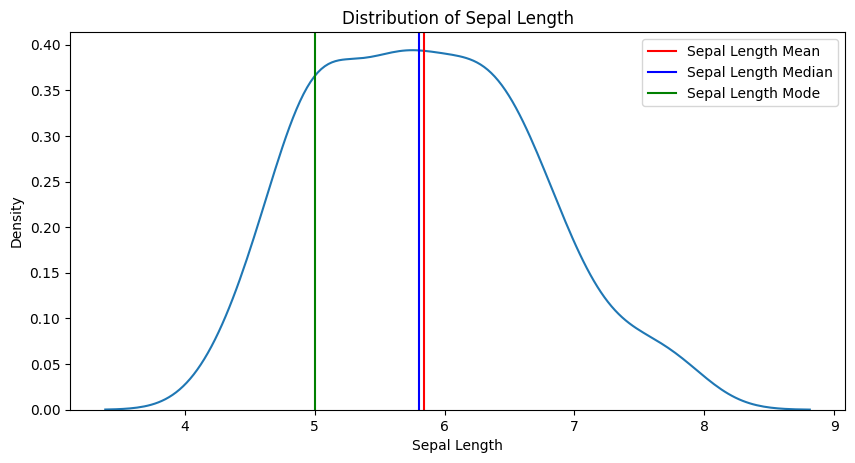

In [ ]:
plt.figure(figsize=(10,5),dpi=100)
sns.kdeplot(df['sepal length'])
plt.axvline(df['sepal length'].mean(),color='red',label='Sepal Length Mean')
plt.axvline(df['sepal length'].median(),color='blue',label='Sepal Length Median')
plt.axvline(df['sepal length'].value_counts().index[0],color='green',label='Sepal Length Mode')
plt.xlabel("Sepal Length")
plt.ylabel("Density")
plt.title("Distribution of Sepal Length")
plt.legend()
print(f"The skew of the sepal length is {df['sepal length'].skew()} and we can say it is normally distributed")
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Is it appropriate to perform the frequency encoding on flower species? Give a suitable reason for your response
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
fe=df.groupby('class').size()/len(df1)
df.loc[:,'Class_Freq_Encode']=df['class'].map(fe)
df.head()

,sepal length,sepal width,petal length,petal width,class,Class_Freq_Encode
0,5.1,3.5,1.4,0.2,setosa,0.333333
1,4.9,3.0,1.4,0.2,setosa,0.333333
2,4.7,3.2,1.3,0.2,setosa,0.333333
3,4.6,3.1,1.5,0.2,setosa,0.333333
4,5.0,3.6,1.4,0.2,setosa,0.333333


In [ ]:
print(f'The Frequency Encoding works by utilizing the frequency of categories as labels, as every category has same frequency so the frequency encoding is not accurate to proceed with')
df.drop(['Class_Freq_Encode'],axis=1,inplace=True)
df

The Frequency Encoding works by utilizing the frequency of categories as labels, as every category has same frequency so the frequency encoding is not accurate to proceed with


,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Does the petal width range from zero to one? If not, transform the values such that they lie between 0 and 1
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()

In [ ]:
print(f"The petal width range from min of {df1['petal width'].min()} cm to max of {df1['petal width'].max()} cm")
petal_width=mm.fit_transform(df1[['petal width']])
pw=pd.DataFrame(petal_width)
pw.rename(columns={0:"Petal Width after min_max transform"},inplace=True)
print(f"The petal width range from min of {pw['Petal Width after min_max transform'].min()} cm to max of {pw['Petal Width after min_max transform'].max()} cm after MinMax transform")
pw.head(5)

The petal width range from min of 0.1 cm to max of 2.5 cm
The petal width range from min of 0.0 cm to max of 1.0 cm after MinMax transform


,Petal Width after min_max transform
0,0.041667
1,0.041667
2,0.041667
3,0.041667
4,0.041667


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Construct a boolean matrix such that it returns 'True' for correlation greater than 0.8</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
df.corr()>0.8

,sepal length,sepal width,petal length,petal width
sepal length,True,False,True,True
sepal width,False,True,False,False
petal length,True,False,True,True
petal width,True,False,True,True


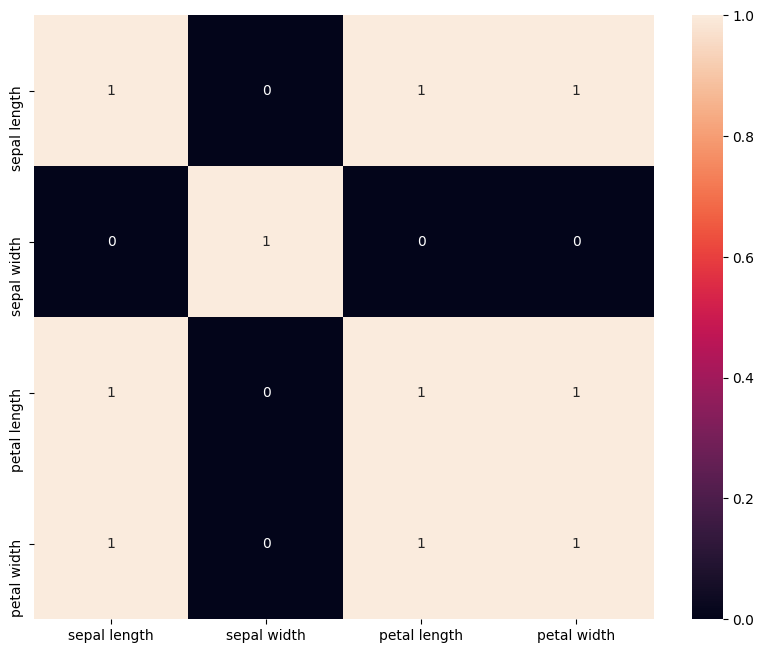

In [ ]:
plt.figure(figsize=(10,8),dpi=100)
sns.heatmap(df.corr()>0.8,annot=True)
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Find the probability that the sepal length of a flower is less than 6 cm using a plot</b>
                </font>
            </div>
        </td>
    </tr>
</table>

The probability that sepal length of a flower is less than 6 cm is 55.33%


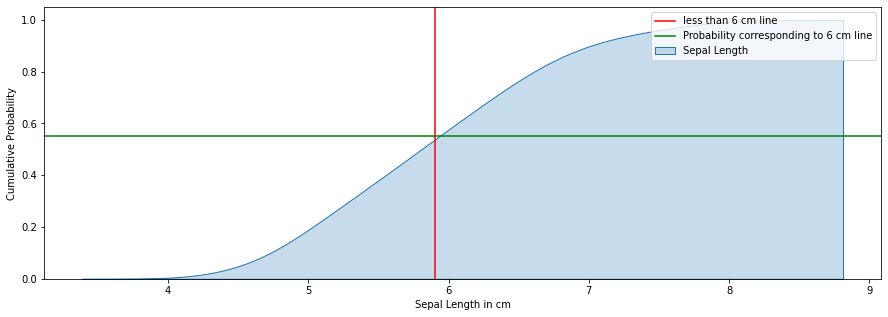

In [ ]:
plt.figure(figsize = (15,5))
sns.kdeplot(data=df['sepal length'],cumulative=True,label='Sepal Length',shade=True)
plt.axvline(df[df['sepal length']<6].max().iloc[0],color='red',label='less than 6 cm line')
plt.axhline((df[df['sepal length']<6].count().iloc[0]/len(df)),color='green',label='Probability corresponding to 6 cm line')
print(f"The probability that sepal length of a flower is less than 6 cm is {(df[df['sepal length']<6].count().iloc[0]/len(df))*100:0.2f}%")
plt.legend()
plt.xlabel("Sepal Length in cm")
plt.ylabel("Cumulative Probability")
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Label the class of each flower with the integer values from 0 to 2</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['flower_label']=le.fit_transform(df['class'])
df.head()

,sepal length,sepal width,petal length,petal width,class,flower_label
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. What is the relationship between petal length and petal width for different flower species?
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

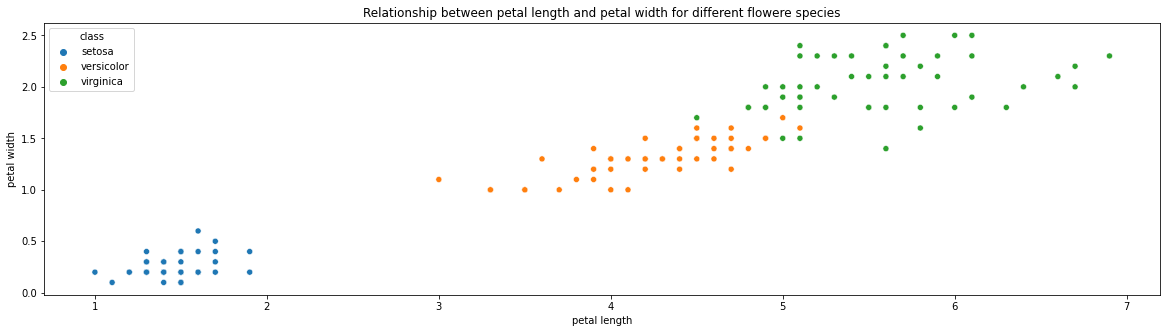

Hence, petal_length and petal_width are directly proportional for all the three classes i.e. setosa, versicolor and virginica but independently, the data points lie under lower range for setosa, medium for versicolor and increased successively for setosa 


In [ ]:
plt.figure(figsize = (20,5))
sns.scatterplot(data=df,x=df['petal length'],y=df['petal width'],hue=df['class'])
plt.title("Relationship between petal length and petal width for different flowere species")
plt.show()
print("Hence, petal_length and petal_width are directly proportional for all the three classes i.e. setosa, versicolor and virginica but independently, the data points lie under lower range for setosa, medium for versicolor and increased successively for setosa ")

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Compare the sepal length of the three flower species
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
pd.pivot_table(data=df,values='sepal length',columns='class',aggfunc='mean')

class,setosa,versicolor,virginica
sepal length,5.006,5.936,6.588


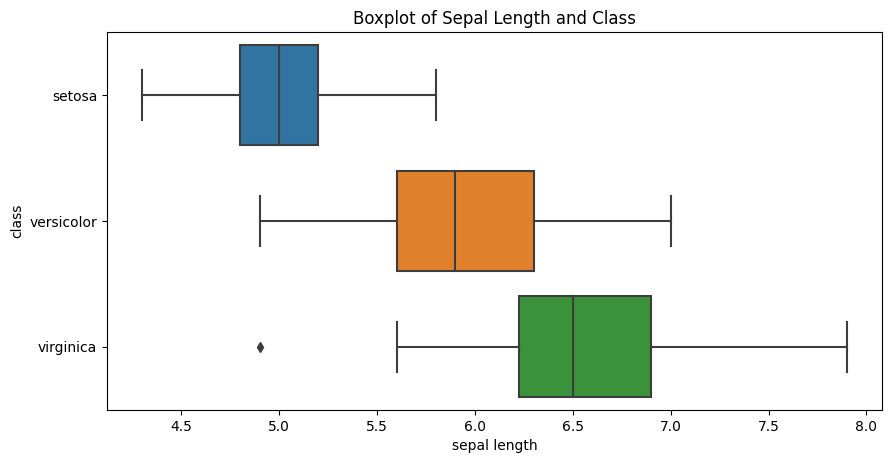

In [ ]:
plt.figure(figsize=(10,5),dpi=100)
plt.xlabel("Sepal Length")
plt.ylabel("Class")
plt.title("Boxplot of Sepal Length and Class")
sns.boxplot(data=df,x=df['sepal length'],y=df['class'])
plt.show()